# import libraries

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# load data

In [16]:
df = pd.read_csv(r"C:\Users\Apple\Documents\mail data segmentation.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EDA

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [21]:
df.shape

(200, 5)

In [23]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [25]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [27]:
df.duplicated().sum()

0

# visualization

In [29]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

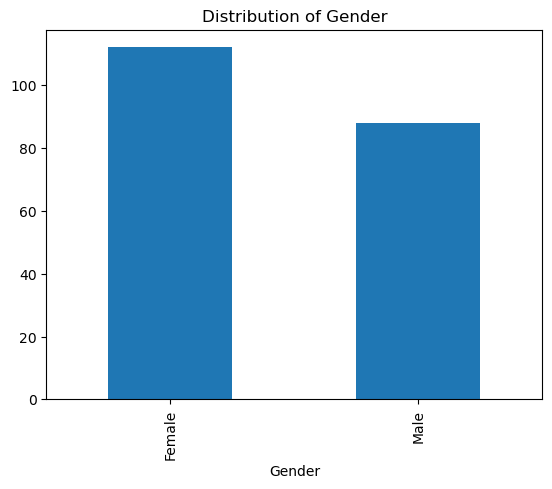

In [31]:
ax = df['Gender'].value_counts().plot(kind='bar', title='Distribution of Gender')

ax.set_xlabel('Gender')
plt.show()

In [33]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

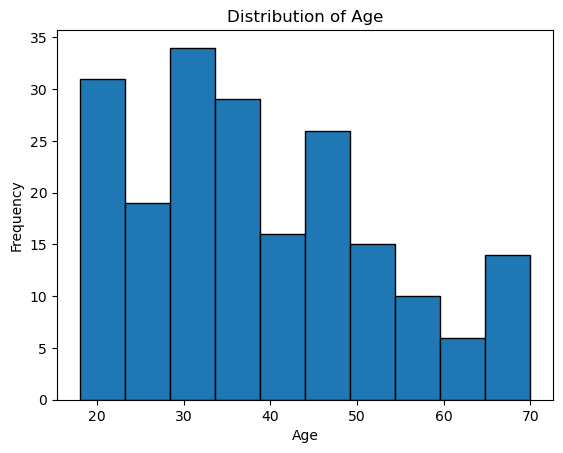

In [37]:
ax = df['Age'].plot(kind='hist', bins=10, edgecolor='black', title='Distribution of Age')

ax.set_xlabel('Age')
plt.show()

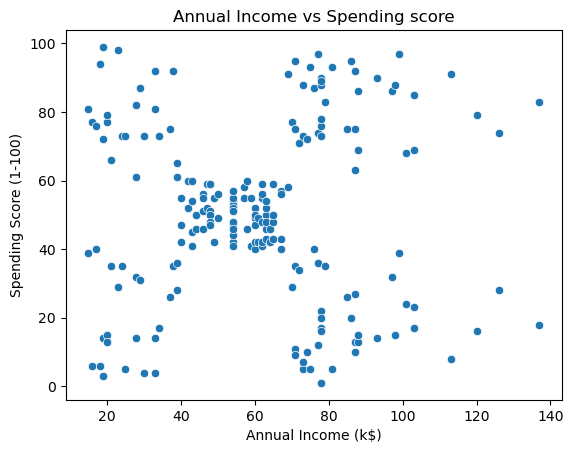

In [39]:
sns.scatterplot( x ='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Annual Income vs Spending score')
plt.show()

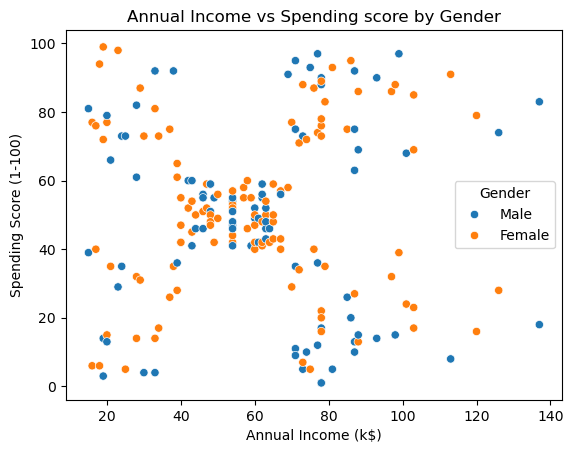

In [41]:
sns.scatterplot( x ='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender' , data=df)
plt.title('Annual Income vs Spending score by Gender')
plt.show()

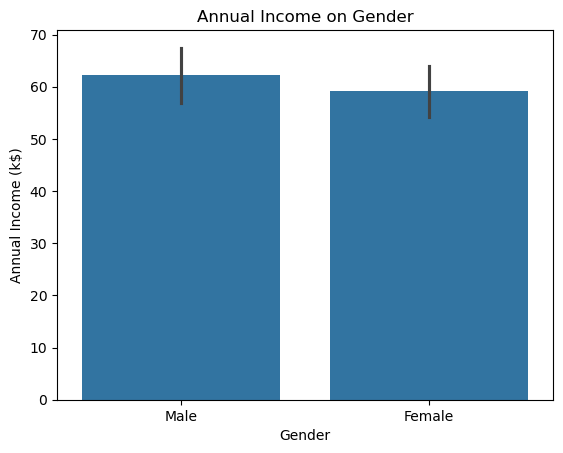

In [45]:
sns.barplot( x='Gender', y='Annual Income (k$)', data=df)

plt.title('Annual Income on Gender')
plt.show()

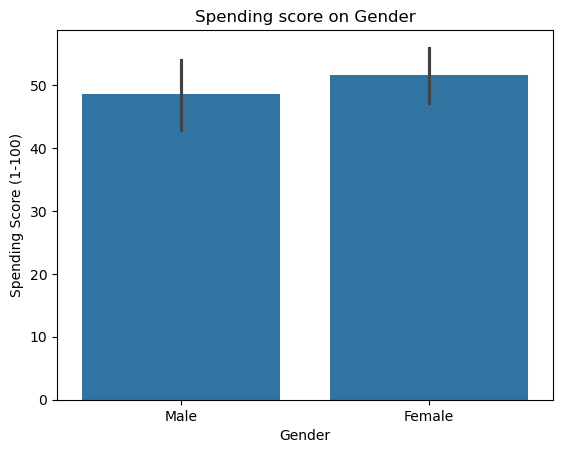

In [47]:
sns.barplot( x='Gender', y='Spending Score (1-100)', data=df)

plt.title('Spending score on Gender')
plt.show()

# KMeans cluster

In [ ]:
# Here, we will do age on spending score and Annual income on spending score

In [ ]:
#Age vs Spendng score

In [49]:
from sklearn.cluster import KMeans

In [51]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [53]:
X =df[['Age', 'Spending Score (1-100)']]

X.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [55]:
k_means = KMeans()
k_means.fit_predict(X)

C:\Users\Apple\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([3, 1, 7, 1, 3, 1, 7, 4, 5, 1, 5, 4, 5, 1, 7, 1, 0, 1, 0, 4, 0, 1,
       5, 1, 5, 4, 0, 1, 0, 4, 5, 1, 5, 4, 5, 1, 5, 1, 0, 1, 6, 4, 0, 1,
       0, 1, 2, 3, 3, 3, 2, 1, 3, 6, 2, 2, 2, 6, 3, 2, 6, 3, 6, 2, 6, 3,
       2, 6, 3, 3, 6, 2, 6, 6, 6, 3, 2, 2, 3, 2, 6, 2, 6, 2, 3, 2, 2, 3,
       1, 2, 6, 3, 2, 0, 3, 3, 2, 3, 2, 3, 3, 2, 6, 3, 2, 3, 6, 2, 6, 6,
       6, 3, 0, 3, 3, 3, 6, 2, 2, 2, 3, 0, 2, 4, 0, 1, 0, 4, 5, 1, 5, 1,
       3, 1, 7, 4, 5, 1, 7, 1, 5, 4, 3, 4, 7, 4, 0, 1, 0, 4, 5, 4, 5, 1,
       5, 4, 7, 1, 7, 1, 0, 4, 7, 4, 0, 1, 5, 4, 0, 1, 5, 1, 7, 4, 5, 4,
       5, 1, 5, 4, 0, 4, 5, 4, 0, 4, 5, 1, 5, 4, 0, 1, 7, 4, 5, 1, 0, 1,
       7, 4])

In [ ]:
#Use Elbow method to 

In [57]:
wcss=[]

for i in range(1,10):
    k_means = KMeans(n_clusters=i)
    y_means = k_means.fit(X)
    wcss.append(k_means.inertia_)

wcss

C:\Users\Apple\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Apple\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Apple\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Apple\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

[171535.50000000003,
 75949.15601023019,
 45840.67661610866,
 28165.583566629342,
 23951.044340905453,
 19619.283134920628,
 17068.664058402763,
 14256.073633773636,
 11437.653142736894]

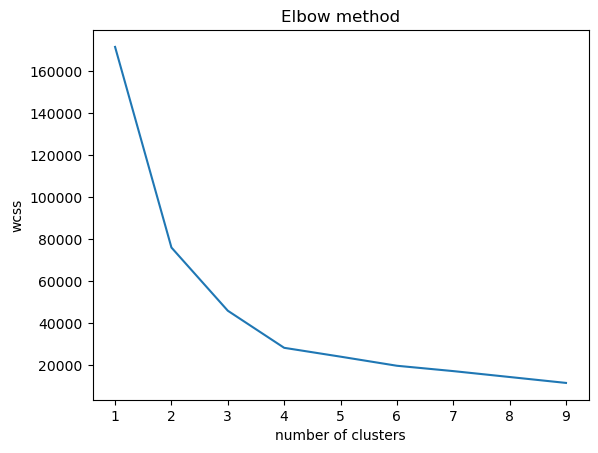

In [59]:
plt.plot(range (1,10),wcss)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [61]:
k_means = KMeans(n_clusters = 4, random_state= 42)
y_means = k_means.fit_predict(X)

y_means

C:\Users\Apple\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

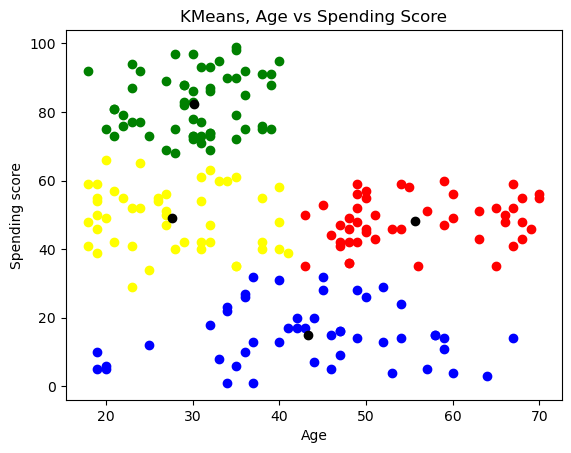

In [65]:
plt.scatter(X.iloc[y_means==0,0], X.iloc[y_means==0,1], c='red', label='cluster 1')
plt.scatter(X.iloc[y_means==1,0], X.iloc[y_means==1,1], c='green', label='cluster 1')
plt.scatter(X.iloc[y_means==2,0], X.iloc[y_means==2,1], c='blue', label='cluster 1')
plt.scatter(X.iloc[y_means==3,0], X.iloc[y_means==3,1], c='yellow', label='cluster 1')
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], c='black')

plt.title('KMeans, Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending score')
plt.show()

In [67]:
Y = df[['Annual Income (k$)', 'Spending Score (1-100)']]

Y.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [69]:
k_means = KMeans()
k_means.fit_predict(Y)

C:\Users\Apple\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 5, 5,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 5, 5, 5, 5, 5,
       5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 7, 6, 7, 6, 7, 6,
       7, 6])

In [71]:
wcss=[]
for i in range(1,10):
    k_means = KMeans(n_clusters=i)
    k_means.fit(Y)
    wcss.append(k_means.inertia_)

wcss


C:\Users\Apple\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Apple\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Apple\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Apple\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

[269981.28,
 183653.32894736843,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 38814.850052563714,
 34918.939642002144,
 25095.70320999756,
 26221.846674804525]

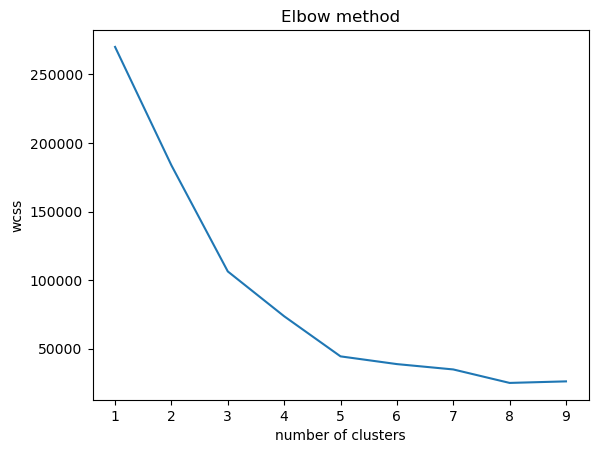

In [73]:
plt.plot(range(1,10),wcss)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()


In [75]:
k_means = KMeans(n_clusters= 5, random_state= 42)
y_means = k_means.fit_predict(Y)

y_means

C:\Users\Apple\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

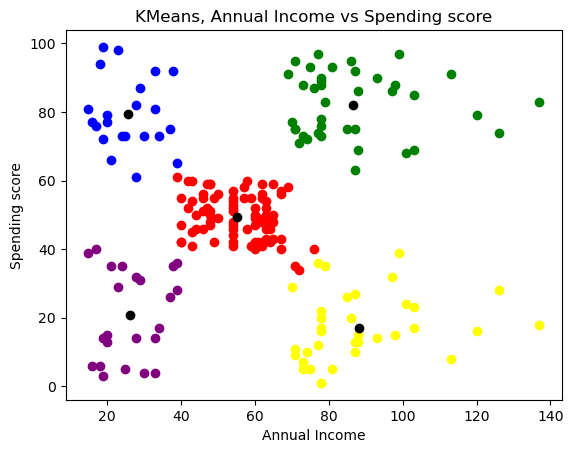

In [77]:
plt.scatter(Y.iloc[y_means==0,0], Y.iloc[y_means==0,1], c='red', label='cluster 1')
plt.scatter(Y.iloc[y_means==1,0], Y.iloc[y_means==1,1], c='green', label='cluster 2')
plt.scatter(Y.iloc[y_means==2,0], Y.iloc[y_means==2,1], c='blue', label='cluster 3')
plt.scatter(Y.iloc[y_means==3,0], Y.iloc[y_means==3,1], c='yellow', label='cluster 4')
plt.scatter(Y.iloc[y_means==4,0], Y.iloc[y_means==4,1], c='purple', label='cluster 5')
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], c='black')

plt.title('KMeans, Annual Income vs Spending score')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.show()

In [81]:
df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()



KeyError: 'Cluster'

In [7]:
import shutil

source_path = "mall customer segmentation.ipynb"  # Current notebook
destination_path = "C:/Users/Apple/Documents/mall_segmentation.ipynb"  # Change path as needed

shutil.move(source_path, destination_path)
print("Notebook saved successfully!")


Notebook saved successfully!
